# Group - 8

# Motion Capture Hand Postures

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data to dataframe using pandas
df = pd.read_csv('Group_8_data_cleaned.csv')

In [3]:
# Splitting the data to input data and output data
X=df.drop(['Class', 'User'],axis=1)
y=df['Class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Scaling the data using MinMax Scaler

In [5]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Training the model using linear classifier

In [6]:
clf = SGDClassifier(loss='hinge', random_state=0)
clf.fit(X_train_scaled, y_train)

SGDClassifier(random_state=0)

# Predicting the test results before getting the best hyper parameters

In [7]:
y_pred=clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.9684152119168552


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      4898
           2       0.94      0.96      0.95      4485
           3       0.95      0.99      0.97      4854
           4       0.98      0.99      0.99      4496
           5       0.97      0.90      0.94      4696

    accuracy                           0.97     23429
   macro avg       0.97      0.97      0.97     23429
weighted avg       0.97      0.97      0.97     23429



In [9]:
#defining the K-fold cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)
cv

KFold(n_splits=10, random_state=1, shuffle=True)

# Getting the best hyper parameters using grid search cross validation

In [10]:
param_grid = {
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

In [11]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive']})

# Best hyper parameters after tuning

In [12]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.1, 'learning_rate': 'optimal'}


In [18]:
# Test results accuracy using grid search cross validation
CV_y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, CV_y_pred)
print("Accuracy of model for test data using Grid Search CV is", acc)

Accuracy of model for test data using Grid Search CV is 0.9427205599897562


# Plotting the accuracy according to alpha

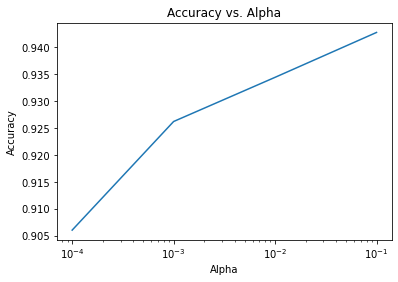

In [14]:
# Vary alpha values and plot corresponding accuracy scores
alphas = [0.0001, 0.001, 0.01, 0.1]
scores = []

for alpha in alphas:
    clf = SGDClassifier(loss='hinge', random_state=0, alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(alphas, scores)
plt.title('Accuracy vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

# Classification report and confusion matrix on test results

In [15]:
print(classification_report(y_test, CV_y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      4898
           2       0.93      0.89      0.91      4485
           3       0.94      0.97      0.95      4854
           4       0.97      0.99      0.98      4496
           5       0.89      0.86      0.87      4696

    accuracy                           0.94     23429
   macro avg       0.94      0.94      0.94     23429
weighted avg       0.94      0.94      0.94     23429



In [16]:
# getting the confusion matrix on test data based on true positive values
conf_matrix = confusion_matrix(y_test, CV_y_pred)
conf_matrix

array([[4882,   16,    0,    0,    0],
       [  20, 4012,   66,   28,  359],
       [   6,    9, 4691,    0,  148],
       [   1,   12,   20, 4450,   13],
       [  47,  282,  195,  120, 4052]], dtype=int64)

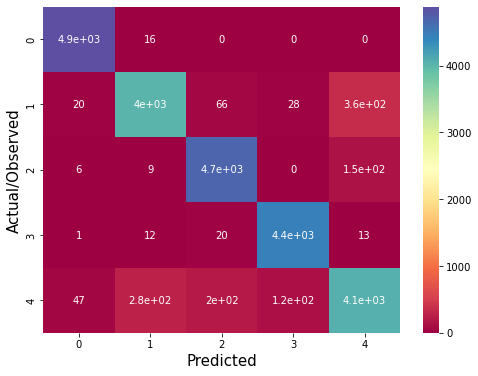

In [17]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);